
### Problem Statement


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.


Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).


CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.


CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered


CTR depends on multiple factors like design, content, personalization, etc. 


How do you design the email content effectively?
What should your subject line look like?
What should be the length of the email?
Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

### Objective:
Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.



### About the Dataset:

You are provided with the information of past email campaigns containing the email attributes like subject and body length, no. of CTA, date and time of an email, type of the audience, whether its a personalized email or not, etc and the target variable indicating the CTR of the email campaign.






### Step 1 :importing reqired libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor                   # for model building
from sklearn.linear_model import LinearRegression                # for model building
from sklearn.ensemble import RandomForestRegressor               # for model building
from sklearn.ensemble import AdaBoostRegressor                   # for model building
from sklearn.neighbors import KNeighborsRegressor                # for model building
from sklearn.svm import SVR                                      # for model building
from sklearn.ensemble import StackingRegressor 
from sklearn.model_selection import KFold                        # for cross validation 
from sklearn.model_selection import cross_val_score              # for evaluation of model
from sklearn.model_selection import cross_val_predict            # for predicting values
import sklearn                                                   # for checking scroing keywords
from numpy import mean 

### Step 2: Data Inspection

In [2]:
train=pd.read_csv("train_F3fUq2S.csv")
test=pd.read_csv("test_Bk2wfZ3.csv")

In [3]:
train.shape,test.shape

((1888, 22), (762, 21))

In [4]:
# We have 1888 rows and 22 columns in Train set whereas Test set has 762 rows and 21 columns.

### Step 3: Data Cleaning

In [5]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
click_rate            0.0
dtype: float64

In [6]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
dtype: float64

In [7]:
# no missing values in the both train anad test data

In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 1
Numerical Features in Test Set: 20


In [9]:
train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


### Step 4: Exploratory Data Analysis

<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

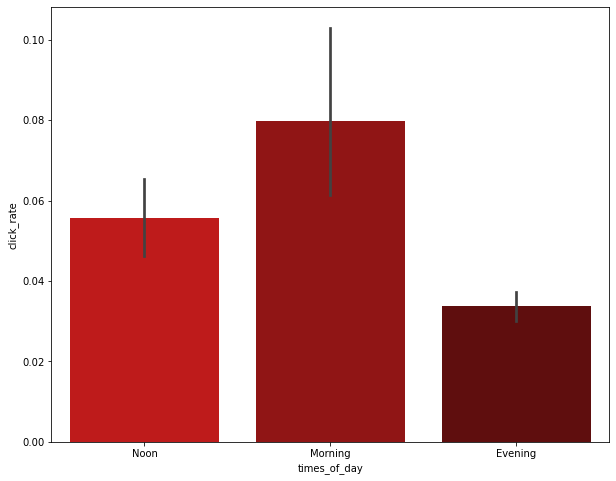

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(y='click_rate',x='times_of_day',data=train,palette='flag')

# Click_rate is high in morning time

### step 5:buliding the model

In [11]:
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [12]:
train.dtypes

campaign_id             int64
sender                  int64
subject_len             int64
body_len                int64
mean_paragraph_len      int64
day_of_week             int64
is_weekend              int64
times_of_day            int32
category                int64
product                 int64
no_of_CTA               int64
mean_CTA_len            int64
is_image                int64
is_personalised         int64
is_quote                int64
is_timer                int64
is_emoticons            int64
is_discount             int64
is_price                int64
is_urgency              int64
target_audience         int64
click_rate            float64
dtype: object

In [13]:
# Seperate Features and Target
X= train.drop(columns = ['click_rate'], axis=1)
Y= train['click_rate']

In [14]:

# creating list
R2_Score, Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error= list(), list(), list(), list()

# creating function to build model and to evaluate it
def MODEL(model, X, Y):
    cv = KFold(n_splits=10, shuffle=False, random_state=None)
    r2 = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    mse = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    rmse = cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    mae = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    
    R2_Score.append(r2)
    Mean_Squared_Error.append(mse)
    Root_Mean_Squared_Error.append(rmse)
    Mean_Absolute_Error.append(mae)
    
    print('R2-Score: {} %'.format(abs(round((mean(r2)*100),2))))
    print('Mean Squared Error: {} %'.format(abs(round((mean(mse)*100),2))))
    print('Root Mean Squared Error: {} %'.format(abs(round((mean(rmse)*100),2))))
    print('Mean Absolute Error: {} %'.format(abs(round((mean(mae)*100),2))))

### Model_1_LinearRegression()

In [15]:
MODEL(LinearRegression(), X, Y)

R2-Score: 0.42 %
Mean Squared Error: 0.65 %
Root Mean Squared Error: 7.77 %
Mean Absolute Error: 4.7 %


### Model_2_DecisionTreeRegressor

In [16]:
MODEL(DecisionTreeRegressor(), X, Y)

R2-Score: 92.45 %
Mean Squared Error: 1.04 %
Root Mean Squared Error: 10.11 %
Mean Absolute Error: 4.76 %


### Model_3_RandomForestRegressor

In [17]:
MODEL(RandomForestRegressor(), X, Y)

R2-Score: 15.08 %
Mean Squared Error: 0.53 %
Root Mean Squared Error: 7.01 %
Mean Absolute Error: 3.84 %


### Model_4_AdaBoostRegressor()

In [18]:
MODEL(AdaBoostRegressor(), X, Y)

R2-Score: 58.6 %
Mean Squared Error: 0.93 %
Root Mean Squared Error: 8.83 %
Mean Absolute Error: 8.01 %


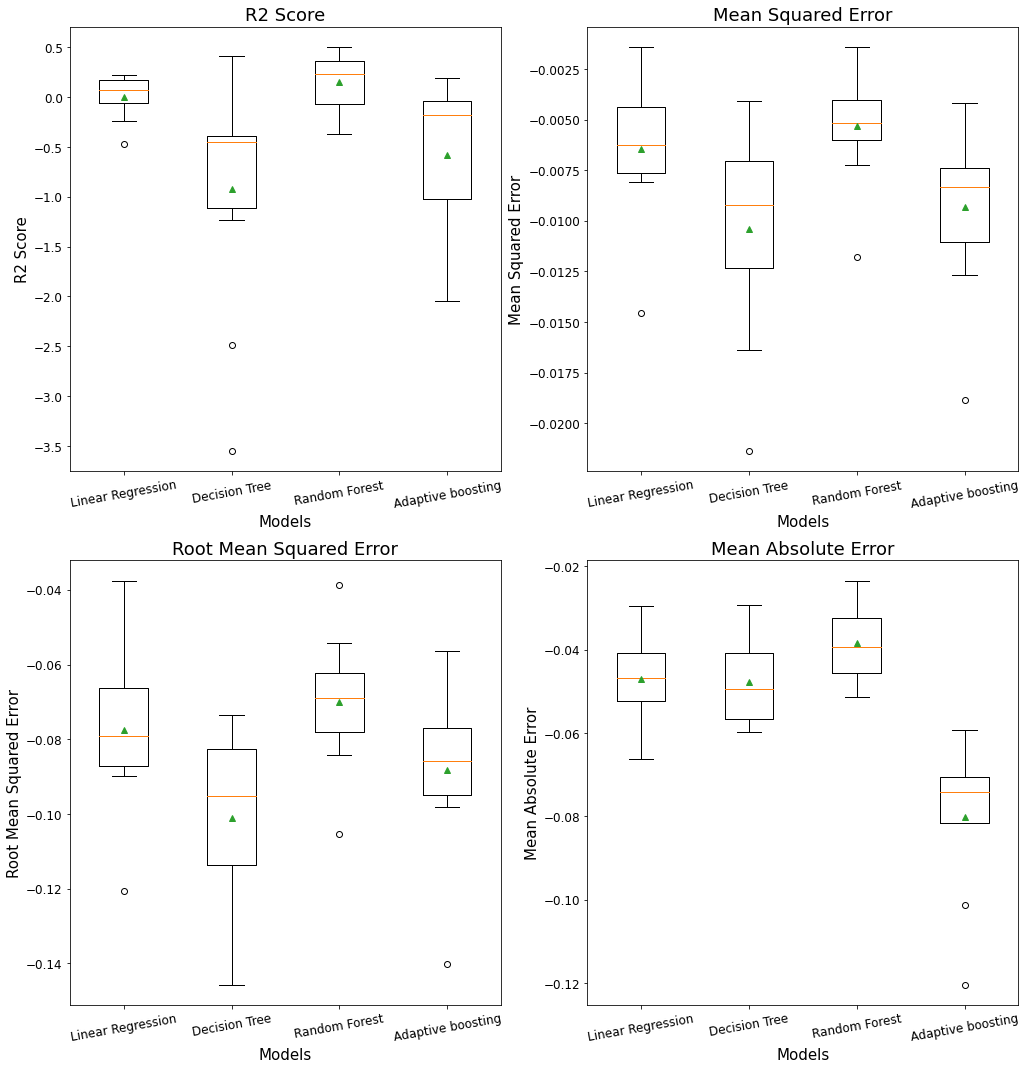

In [19]:
# creating list to help in visualization of model evaluation score
names=['Linear Regression','Decision Tree','Random Forest','Adaptive boosting']
results = [R2_Score, Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error]
scores=['R2 Score','Mean Squared Error','Root Mean Squared Error','Mean Absolute Error']

# visualizing count of data of all categorical features 
fig,ax = plt.subplots(figsize=(17,18))
c=1
for i in range(len(results)):
    plt.subplot(2,2,c)
    plt.boxplot(results[i], labels=names, showmeans=True)
    plt.xlabel('Models', fontsize = 15)
    plt.ylabel(scores[i], fontsize = 15)
    plt.title(scores[i], fontsize = 18)
    plt.xticks(fontsize = 12, rotation=10)
    plt.yticks(fontsize = 12)
    c+=1

# R2 score is  high for decision_treee go using it for the prediction.

In [20]:
model =DecisionTreeRegressor()
model.fit(X, Y)
final_predictions = model.predict(test)
submission=pd.DataFrame()
submission['campaign_id'] =test.campaign_id
submission['click_rate'] = final_predictions
submission.to_csv('my_submission2.csv', index=False)

In [21]:
submission.head()

,campaign_id,click_rate
0,1889,0.030680
1,1890,0.131313
2,1891,0.350746
3,1892,0.350746
4,1893,0.048611
